#### About Dataset

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pickle

In [50]:
df = pd.read_csv("avocado.csv")
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [51]:
df.shape

(18249, 14)

In [52]:
df = df.drop(columns='Unnamed: 0',axis=1)
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [53]:
df["region"].value_counts()

GrandRapids            338
RaleighGreensboro      338
SanFrancisco           338
Atlanta                338
Midsouth               338
Tampa                  338
StLouis                338
Pittsburgh             338
MiamiFtLauderdale      338
Boise                  338
NewOrleansMobile       338
Charlotte              338
LasVegas               338
BuffaloRochester       338
Syracuse               338
Nashville              338
Louisville             338
California             338
SouthCentral           338
Northeast              338
Southeast              338
Columbus               338
Chicago                338
PhoenixTucson          338
Detroit                338
Albany                 338
GreatLakes             338
Portland               338
Philadelphia           338
CincinnatiDayton       338
Roanoke                338
TotalUS                338
HarrisburgScranton     338
LosAngeles             338
Plains                 338
SouthCarolina          338
HartfordSpringfield    338
S

In [54]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

#### We have two types of avocados 'conventional' and 'organic'

In [55]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### We don't have any null values on the dataset

#### Converting date column as month

In [56]:
df['Date']= pd.to_datetime(df['Date'],format='%Y-%m-%d')
df["Month"] = df["Date"].dt.month
df.head(3)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12


In [57]:
df = df.drop(columns='Date',axis=1)

### EDA

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

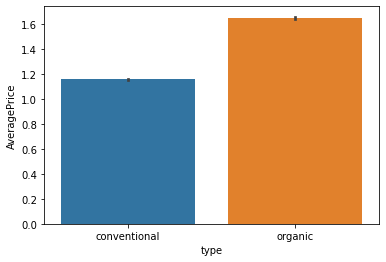

In [58]:
sns.barplot(x='type',y="AveragePrice",data=df)

#### Organic avocados is more expensive than conventional

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

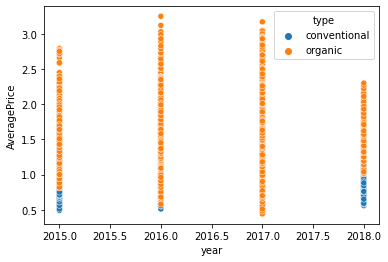

In [59]:
sns.scatterplot(x="year",y="AveragePrice",hue="type",data=df)

#### organic avocados cost is more as compared to conventional

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

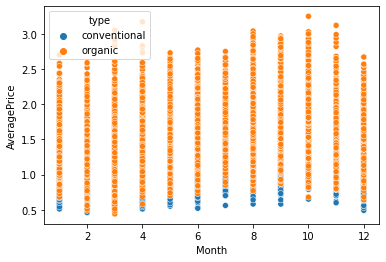

In [60]:
sns.scatterplot(x="Month",y="AveragePrice",hue="type",data=df)

#### Throughout the year the price remains almost steady

#### Converting object datatype into numerical

In [61]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['region'] = label.fit_transform(df['region'])
df['type'] = label.fit_transform(df['type'])
df.head(4)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  Month         18249 non-null  int64  
dtypes: float64(9), int32(2), int64(2)
memory usage: 1.7 MB


#### Checking correlation

In [63]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085


#### From the correlation matrix its evident that multicollinearity exists

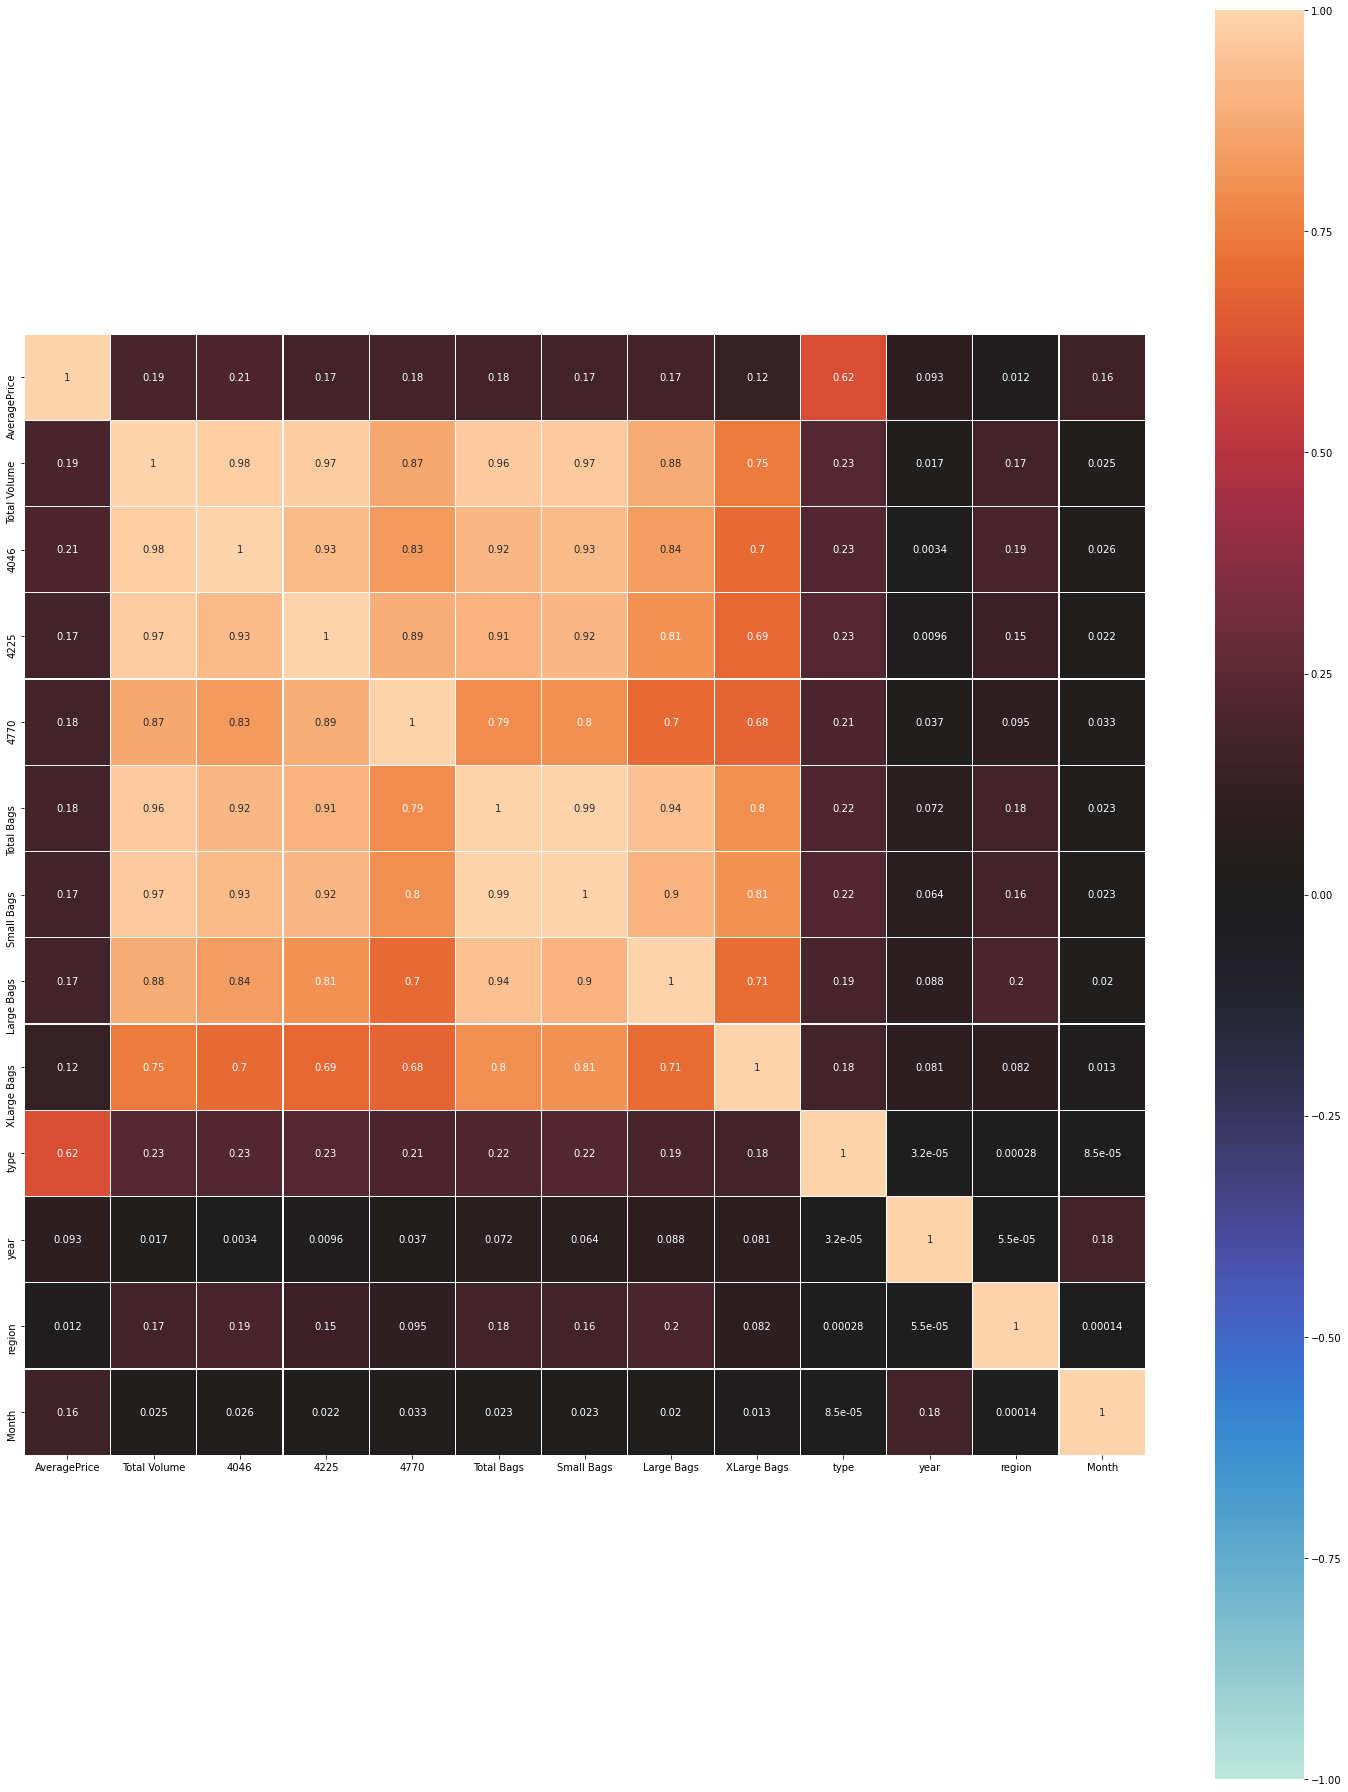

In [64]:
df_corr = df.corr().abs()
plt.figure(figsize=(20,25))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square = True,center=0,fmt='.2g',linewidth=.2)
plt.tight_layout()

#### Type of avocado palys major role in price and region and year doesn't play any significant role towards the price

#### Statistical analysis of data

In [65]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,12.000000


#### There is an anomaly is the column XLarge Bags

In [66]:
df.shape

(18249, 13)

#### Checking for outliers

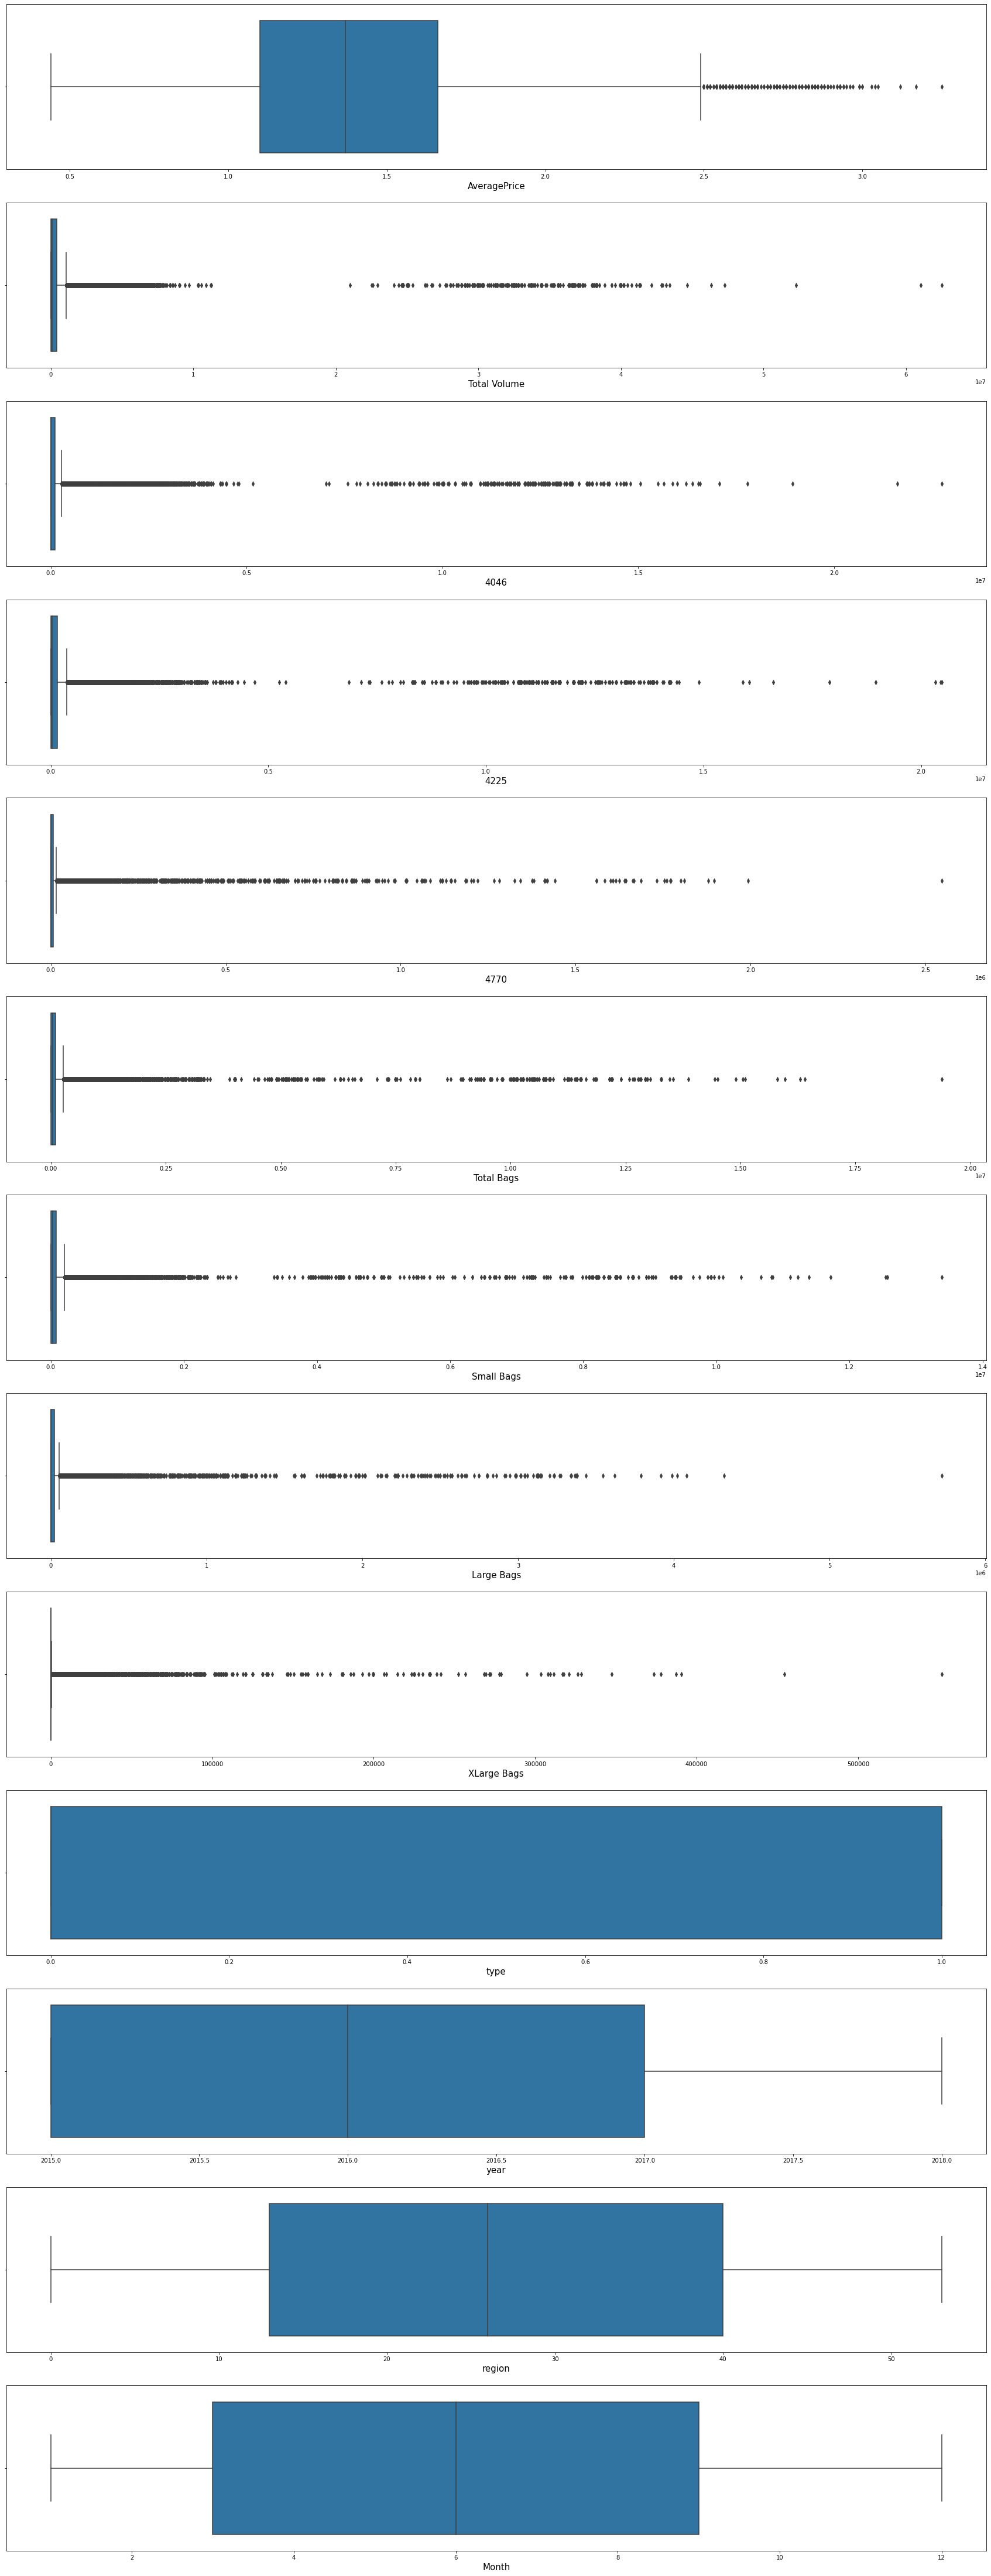

In [67]:
plt.figure(figsize=(30,80))
gr = 1
for column in df:
    if gr<=13:
        ax = plt.subplot(13,1,gr)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### Outliers exists in the dataset except type, region,month and year

#### Checking skewness

In [68]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
dtype: float64

#### Visualizing the distribution

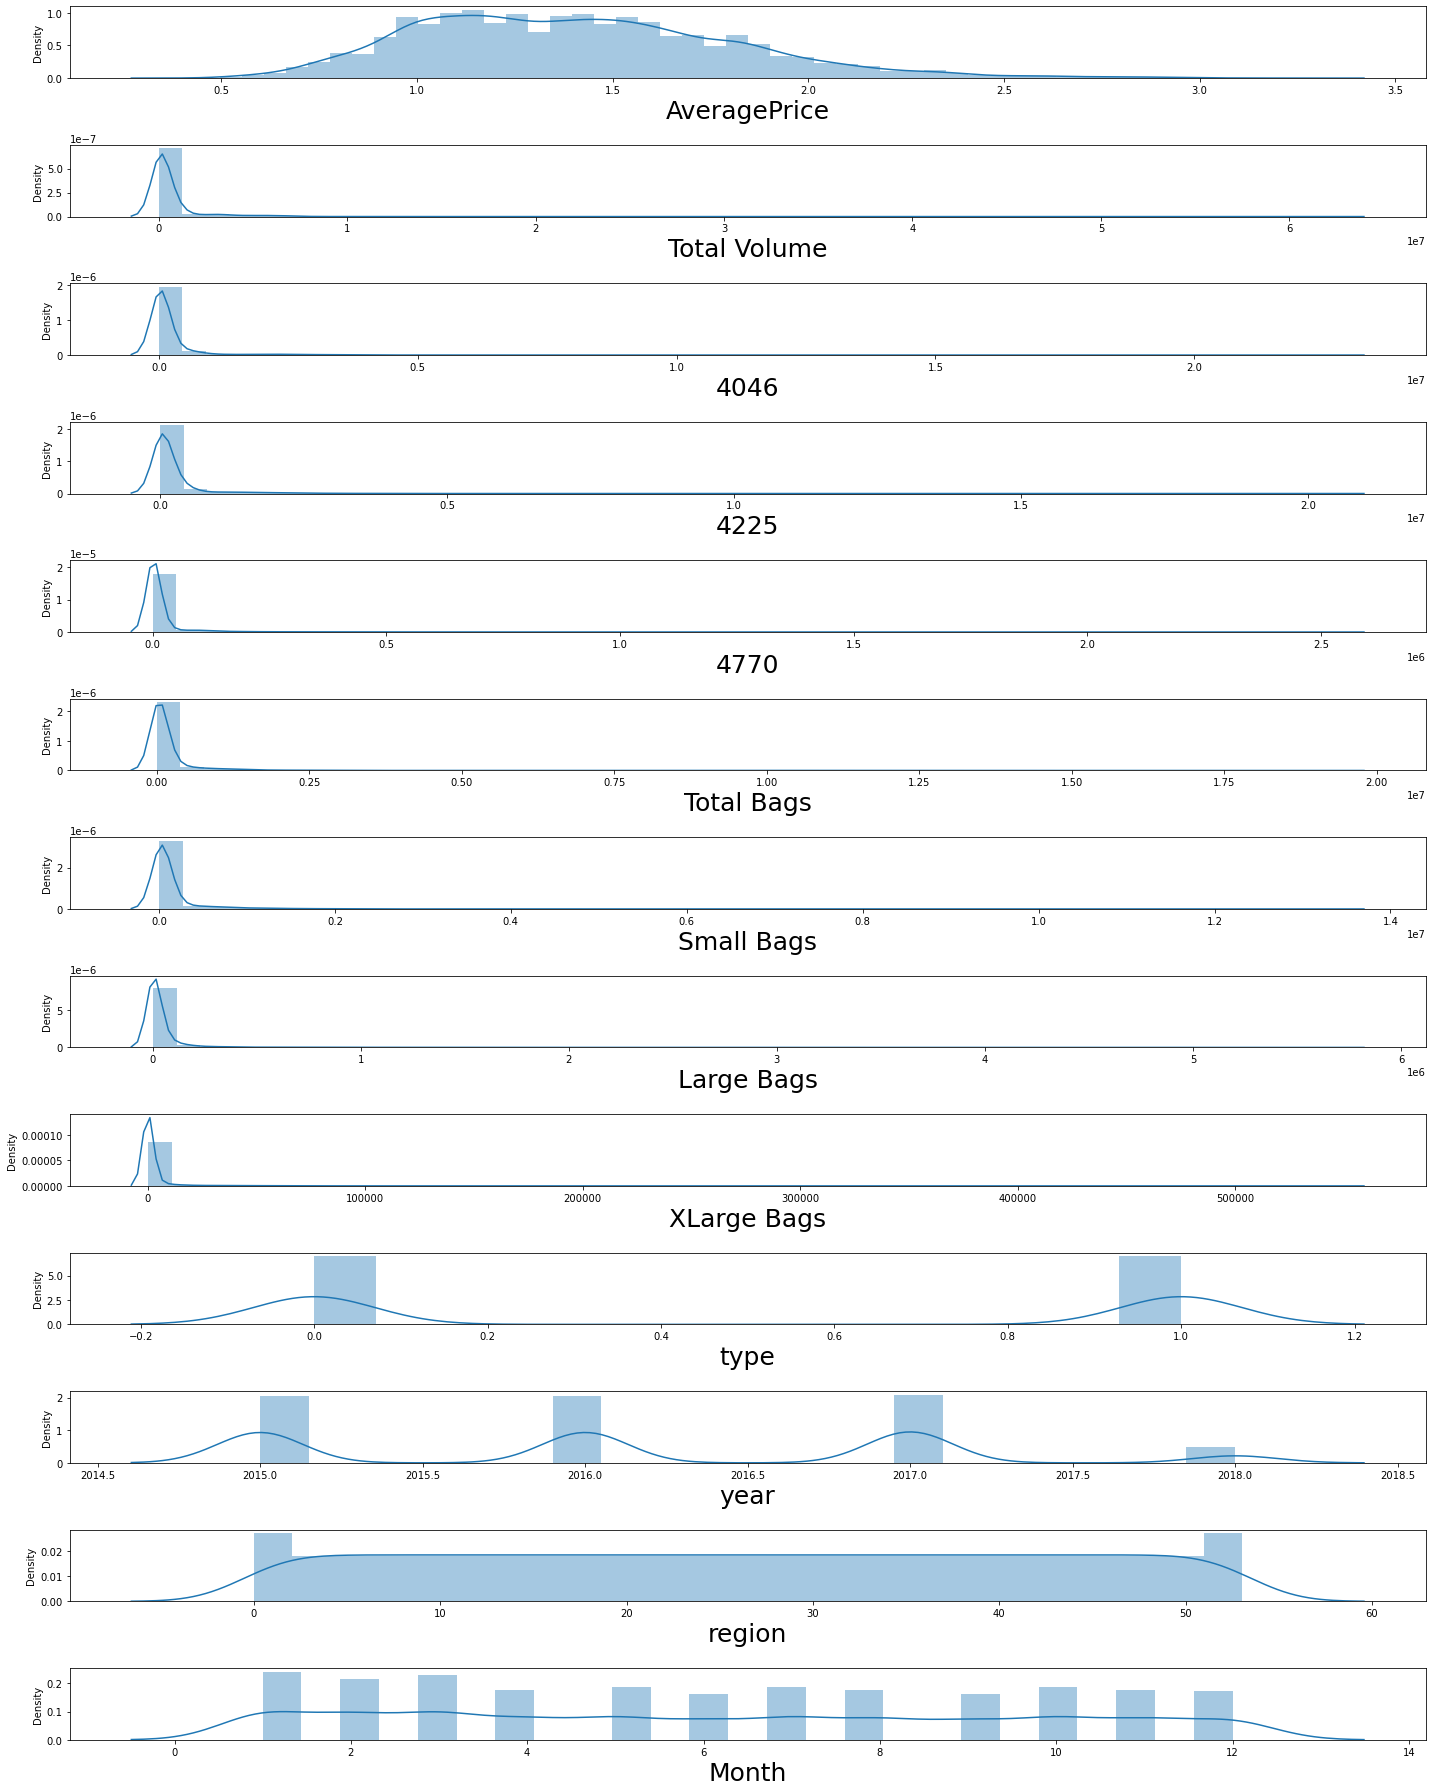

In [69]:
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in df:
    if plotnumber<=13:
        ax=plt.subplot(13,1,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

#### From the grpah its evident that the data is skewed

#### Dropping year and region as they contribute very less towards the price 

In [70]:
df = df.drop(columns=['region','year'],axis=1)
df.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,12


#### Removing outliers

In [71]:
from scipy.stats import zscore
z = np.abs(zscore(df))
print("Old shape : ",z.shape)
print(z)
print("Row numbers : ",np.where(z>3)[0])
print("Column numbers : ",np.where(z>3)[0])
index = np.where(z>3)[0]
df1 = df.drop(df.index[index])
print("New shape : ",df1.shape)

Old shape :  (18249, 11)
[[0.18868864 0.22771641 0.23081597 ... 0.17557961 0.99983562 1.64763162]
 [0.13901962 0.23042664 0.23110251 ... 0.17557961 0.99983562 1.64763162]
 [1.18206895 0.21208462 0.23100731 ... 0.17557961 0.99983562 1.64763162]
 ...
 [1.15237477 0.24233073 0.2306933  ... 0.17557961 1.00016441 1.46495942]
 [1.30138182 0.24162464 0.2304279  ... 0.17557961 1.00016441 1.46495942]
 [0.53151208 0.24125273 0.22934712 ... 0.17557961 1.00016441 1.46495942]]
Row numbers :  [  346   359   780 ... 17304 17402 17428]
Column numbers :  [  346   359   780 ... 17304 17402 17428]
New shape :  (17651, 11)


#### Data loss in percentage

In [72]:
loss = (18249-17651)/18249*100
print("While removing outliers we loss ",loss,"% of data")

While removing outliers we loss  3.276891884486821 % of data


#### Splitting dataset into x and y

In [73]:
x = df.drop("AveragePrice",axis=1)
y = df["AveragePrice"]

#### Removing Skewness

In [74]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[-0.08660524, -0.65861896,  0.30731294, ..., -0.69984934,
        -0.99983562,  1.49434741],
       [-0.15574567, -0.77686953,  0.23164739, ..., -0.69984934,
        -0.99983562,  1.49434741],
       [ 0.17932662, -0.73194656,  0.57950332, ..., -0.69984934,
        -0.99983562,  1.49434741],
       ...,
       [-0.77150535, -0.61983119, -0.77249619, ..., -0.69984934,
         1.00016441, -1.64204669],
       [-0.69807719, -0.55028196, -0.71054316, ..., -0.69984934,
         1.00016441, -1.64204669],
       [-0.66380937, -0.36790819, -0.78517306, ..., -0.69984934,
         1.00016441, -1.64204669]])

In [75]:
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

Total Volume    0.011171
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
Month          -0.146584
dtype: float64

#### Skewness exists in XLargeBags, dropping that column as it contribute less towards the target variable

#### Scaling X

In [76]:
scale = StandardScaler()
X_scaled = scale.fit_transform(x_new)

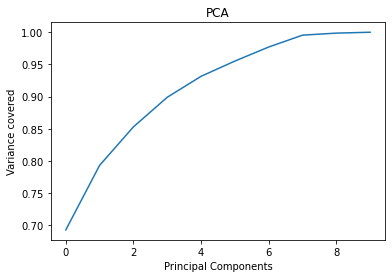

In [77]:
pca = PCA()
pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance covered")
plt.title("PCA")
plt.show()

In [78]:
pca = PCA(n_components=8)
principal = pca.fit_transform(X_scaled)
principal_x = pd.DataFrame(principal,columns=['PC1','PC2',"PC3","PC4","PC5","PC6","PC7","PC8"])
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.648758,-1.509922,-0.523094,0.855864,0.770339,-0.300601,-0.483678,-0.821803
1,-0.696844,-1.513533,-0.532087,0.819998,0.746608,-0.432539,-0.543694,-0.761376
2,-0.412465,-1.504464,-0.531172,0.952909,0.932830,-0.454812,-0.242829,-0.903386
3,-0.629004,-1.506688,-0.524701,0.817797,0.997467,-0.254481,-0.331349,-0.844927
4,-0.735712,-1.295283,-0.509508,0.686717,0.979141,-0.312331,-0.477841,-0.693283
...,...,...,...,...,...,...,...,...
18244,-1.951005,1.272904,0.456634,-0.017912,-0.763718,0.204693,-0.273474,-0.042776
18245,-2.074513,1.688077,0.323298,-0.033775,-0.593460,0.105062,-0.089875,-0.244316
18246,-1.684790,1.664973,-0.302945,0.471899,-0.150468,-0.522752,0.383384,0.881454
18247,-1.557947,1.669732,-0.247569,0.504616,-0.187823,-0.494156,0.398287,0.857351


#### Finding the best random state

In [79]:
max_score = 0
max_rs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    score = r2_score(y_test,y_pred)
    if score>max_score:
        max_score = score
        max_rs = i
print("Maximum score is",max_score,"when",max_rs,"is the random state")

Maximum score is 0.5067295920420047 when 113 is the random state


#### Splitting the dataset into train and test

In [80]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size=0.25,random_state = 113)

#### i) DecisionTree Regressor

In [81]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Score in training dataset is ",dt.score(x_train,y_train))
print("Score in testing dataset is ",dt.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_dt))
print("MSE is :",mean_squared_error(y_test,y_pred_dt))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_dt)))
print("R2 score is : ",r2_score(y_test,y_pred_dt))

Score in training dataset is  1.0
Score in testing dataset is  0.5879962629750692
MAE is :  0.17086785009861932
MSE is : 0.06667532325224632
RMSE is : 0.258215652608912
R2 score is :  0.5879962629750692


#### Decision tree works with an accuracy of 58.54%

#### ii) Random Forest Regressor

In [82]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score in training dataset is ",rf.score(x_train,y_train))
print("Score in testing dataset is ",rf.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_rf))
print("MSE is :",mean_squared_error(y_test,y_pred_rf))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print("R2 score is : ",r2_score(y_test,y_pred_rf))

Score in training dataset is  0.971595961001859
Score in testing dataset is  0.790714040564895
MAE is :  0.12856309445540212
MSE is : 0.03386913210607057
RMSE is : 0.18403568161112283
R2 score is :  0.790714040564895


#### random Forest works with an accuracy of 79.26%

#### iii) GradientBoosting Regressor

In [83]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)
print("Score in training dataset is ",gbr.score(x_train,y_train))
print("Score in training dataset is ",gbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_gbr))
print("MSE is :",mean_squared_error(y_test,y_pred_gbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_gbr)))
print("R2 score is : ",r2_score(y_test,y_pred_gbr))

Score in training dataset is  0.6633057276359807
Score in training dataset is  0.6550853278402078
MAE is :  0.1798581625596704
MSE is : 0.05581817637567963
RMSE is : 0.2362587064547667
R2 score is :  0.6550853278402078


#### GradientBoosting Regressor works with an accuracy of 65.51%

#### iv) SVR

In [84]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
print("Score in training dataset is ",svr.score(x_train,y_train))
print("Score in training dataset is ",svr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_svr))
print("MSE is :",mean_squared_error(y_test,y_pred_svr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_svr)))
print("R2 score is : ",r2_score(y_test,y_pred_svr))

Score in training dataset is  0.663679731705384
Score in training dataset is  0.6728538689866648
MAE is :  0.16903200854224404
MSE is : 0.0529426606504687
RMSE is : 0.23009272185462257
R2 score is :  0.6728538689866648


#### SVR works with an accuracy of 67.29%

#### v) XGB Regressor

In [85]:
import xgboost as xgb
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)
y_pred_xgbr = xgbr.predict(x_test)
print("Score in training dataset is ",xgbr.score(x_train,y_train))
print("Score in training dataset is ",xgbr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_xgbr))
print("MSE is :",mean_squared_error(y_test,y_pred_xgbr))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_xgbr)))
print("R2 score is : ",r2_score(y_test,y_pred_xgbr))

Score in training dataset is  0.890330543115268
Score in training dataset is  0.7546670209188846
MAE is :  0.14624831582432432
MSE is : 0.03970268765712709
RMSE is : 0.19925533281979455
R2 score is :  0.7546670209188846


#### XGBRegressor works with an accuracy of 75.47%

#### vi) KNN Regressor

In [86]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print("Score in training dataset is ",knn.score(x_train,y_train))
print("Score in training dataset is ",knn.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred_knn))
print("MSE is :",mean_squared_error(y_test,y_pred_knn))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred_knn)))
print("R2 score is : ",r2_score(y_test,y_pred_knn))

Score in training dataset is  0.8727379481473188
Score in training dataset is  0.787235054112166
MAE is :  0.1265513916283147
MSE is : 0.034432142888450576
RMSE is : 0.18555900109790033
R2 score is :  0.787235054112166


#### KNN Regressor works with an accuracy of 78.72%

#### vii) Linear Regression

In [87]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Score in training dataset = ",lr.score(x_train,y_train))
print("Score in testing dataset = ",lr.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred))
print("MSE is :",mean_squared_error(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score is : ",r2_score(y_test,y_pred))

Score in training dataset =  0.47628941812668735
Score in testing dataset =  0.5067295920420047
MAE is :  0.21846790618507334
MSE is : 0.07982685821943555
RMSE is : 0.2825364723702686
R2 score is :  0.5067295920420047


#### Linear regression works with an accuracy of 50.67%

### Finding Cross Validation Score

In [88]:
cvs = cross_val_score(dt,principal_x,y,cv=5)
cvs = np.mean(cvs)
print("Cross validation score of Decision tree model is : ",cvs)

Cross validation score of Decision tree model is :  -0.5778183878736065


In [89]:
cvs = cross_val_score(rf,principal_x,y,cv=5)
cvs = np.mean(cvs)
print("Cross validation score of RandomForestRegressor model is : ",cvs)

Cross validation score of RandomForestRegressor model is :  -0.02610469806515896


In [90]:
cvs = cross_val_score(gbr,principal_x,y,cv=5)
cvs = np.mean(cvs)
print("Cross validation score of GradientBoostingRegressor model is : ",cvs)

Cross validation score of GradientBoostingRegressor model is :  0.052815100496878896


In [91]:
cvs = cross_val_score(svr,principal_x,y,cv=5)
cvs = np.mean(cvs)
print("Cross validation score of SVR model is : ",cvs)

Cross validation score of SVR model is :  0.07929388247963758


In [92]:
cvs = cross_val_score(xgbr,principal_x,y,cv=5)
cvs = np.mean(cvs)
print("Cross validation score of XGBRegressor model is : ",cvs)

Cross validation score of XGBRegressor model is :  -0.005220750977473121


In [93]:
cvs = cross_val_score(knn,principal_x,y,cv=5)
cvs = np.mean(cvs)
print("Cross validation score of KNNRegressor model is : ",cvs)

Cross validation score of KNNRegressor model is :  -0.22155385752807027


#### DecisionTree turns out to be the best model because for all others the difference is too high

### HyperParameter Tuning

In [94]:
params = {'random_state':[1,50],
         'max_depth':[2,10,2],
         'min_samples_leaf':[1,10,2],
         'min_samples_split':[2,12,2]}
grid = GridSearchCV(estimator = dt,param_grid = params,cv=10,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

Best Parameters are 
 {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 1}


In [95]:
dt = DecisionTreeRegressor(max_depth=10,min_samples_leaf=10,min_samples_split=2,random_state=1)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Score in training dataset is ",dt.score(x_train,y_train))
print("Score in testing dataset is ",dt.score(x_test,y_test))
print("MAE is : ",mean_absolute_error(y_test,y_pred))
print("MSE is :",mean_squared_error(y_test,y_pred))
print("RMSE is :",np.sqrt(mean_squared_error(y_test,y_pred)))

Score in training dataset is  0.7518418165854743
Score in testing dataset is  0.634658945334101
MAE is :  0.17652716975197985
MSE is : 0.05912381546114814
RMSE is : 0.2431538925478022


#### After hyperparameter tuning decisiontree model works with an accuracy of 63.47%

#### Model saving

In [96]:
filename = 'avocado.pkl'
pickle.dump(lr,open(filename,'wb'))